## 모델 튜닝

In [5]:
# 라이브러리를 임포트합니다.
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.layers import Dropout
import matplotlib.pyplot as plt

In [8]:
# 랜덤 시드를 설정합니다.
np.random.seed(0)

# 필요한 특성 개수를 지정합니다.
number_of_features = 1000

# 영화 리뷰 데이터에서 훈련 데이터와 타깃 벡터를 로드합니다.
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# 영화영화 리뷰 데이터를 원-핫 인코딩된 특성 행렬로 변환합니다.
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 신경망 모델을 만듭니다.
network = models.Sequential()

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16,
                         activation="relu",
                         input_shape=(number_of_features,)))

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16, activation="relu"))

# 시그모이드 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=1, activation="sigmoid"))

# 신경망의 모델 설정을 완료합니다.
network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                optimizer="rmsprop", # 옵티마이저
                metrics=["accuracy"]) # 성능 지표

# 신경망을 훈련합니다.
# 1000개 데이터를 미니배치로 추출해서 15회 학습하는 것으로 설정
history = network.fit(features_train, # 특성
                      target_train, # 타깃
                      epochs=15, # 에포크 횟수
                      verbose=1, # 출력 없음
                      batch_size=1000, # 배치의 샘플 개수
                      validation_data=(features_test, target_test)) # 테스트 데이터
print('\n')
print('모델 성능 :')
print(network.evaluate(features_test, target_test))

# 훈련 손실과 테스트 손실의 기록을 저장합니다.
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

# 에포크 횟수를 사용해 카운트 객체를 만듭니다.
epoch_count = range(1, len(training_accuracy) + 1)



Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 0s 17us/step - loss: 0.5892 - accuracy: 0.7075 - val_loss: 0.4849 - val_accuracy: 0.8040
Epoch 2/15
25000/25000 [==============================] - 0s 15us/step - loss: 0.4344 - accuracy: 0.8233 - val_loss: 0.3990 - val_accuracy: 0.8384
Epoch 3/15
25000/25000 [==============================] - 0s 15us/step - loss: 0.3727 - accuracy: 0.8460 - val_loss: 0.3668 - val_accuracy: 0.8482
Epoch 4/15
25000/25000 [==============================] - 0s 15us/step - loss: 0.3445 - accuracy: 0.8567 - val_loss: 0.3422 - val_accuracy: 0.8574
Epoch 5/15
25000/25000 [==============================] - 0s 15us/step - loss: 0.3263 - accuracy: 0.8670 - val_loss: 0.3823 - val_accuracy: 0.8335
Epoch 6/15
25000/25000 [==============================] - 0s 15us/step - loss: 0.3212 - accuracy: 0.8675 - val_loss: 0.3404 - val_accuracy: 0.8566
Epoch 7/15
25000/25000 [==============================] - 0s 15us/st

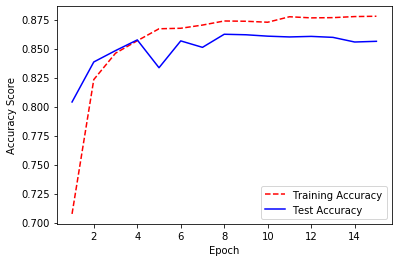

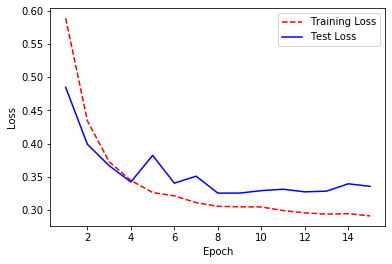

In [9]:
# 훈련 정확도와 테스트 정확도 기록을 저장합니다.
import matplotlib.pyplot as plt
%matplotlib inline

# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Accuracy')
# plt.legend(['train','test'], loc='upper left')
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy Score")
# plt.show()

training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

training_loss = history.history["loss"]
test_loss = history.history['val_loss']

plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# 정확도 그래프를 그립니다.
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();

plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")

# 정확도 그래프를 그립니다.
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

## Dropout 추가 - 드롭아웃으로 과대적합 줄이기

In [14]:
# 랜덤 시드를 설정합니다.
np.random.seed(0)

# 필요한 특성 개수를 지정합니다.
number_of_features = 1000

# 영화 리뷰 데이터에서 훈련 데이터와 타깃 벡터를 로드합니다.
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# 영화영화 리뷰 데이터를 원-핫 인코딩된 특성 행렬로 변환합니다.
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 신경망 모델을 만듭니다.
network = models.Sequential()

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dropout(0.2, input_shape=(number_of_features,)))

# Dropout 추가
network.add(Dropout(0.3, noise_shape=None, seed=None))

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16, activation="relu"))

# Dropout 추가
network.add(Dropout(0.5, noise_shape=None, seed=None))

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16, activation="relu"))

# 시그모이드 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=1, activation="sigmoid"))


# 신경망의 모델 설정을 완료합니다.
network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                optimizer="rmsprop", # 옵티마이저
                metrics=["accuracy"]) # 성능 지표

# 신경망을 훈련합니다.
# 1000개 데이터를 미니배치로 추출해서 15회 학습하는 것으로 설정
history = network.fit(features_train, # 특성
                      target_train, # 타깃
                      epochs=15, # 에포크 횟수
                      verbose=1, # 출력 없음
                      batch_size=1000, # 배치의 샘플 개수
                      validation_data=(features_test, target_test)) # 테스트 데이터
print('\n')
print('모델 성능 :')
print(network.evaluate(features_test, target_test))

# 훈련 손실과 테스트 손실의 기록을 저장합니다.
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

# 에포크 횟수를 사용해 카운트 객체를 만듭니다.
epoch_count = range(1, len(training_accuracy) + 1)



Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 1s 29us/step - loss: 0.6660 - accuracy: 0.5924 - val_loss: 0.5944 - val_accuracy: 0.7725
Epoch 2/15
25000/25000 [==============================] - 1s 25us/step - loss: 0.5895 - accuracy: 0.6987 - val_loss: 0.5005 - val_accuracy: 0.8142
Epoch 3/15
25000/25000 [==============================] - 1s 25us/step - loss: 0.5366 - accuracy: 0.7401 - val_loss: 0.4444 - val_accuracy: 0.8345
Epoch 4/15
25000/25000 [==============================] - 1s 24us/step - loss: 0.5080 - accuracy: 0.7564 - val_loss: 0.4105 - val_accuracy: 0.8442
Epoch 5/15
25000/25000 [==============================] - 1s 24us/step - loss: 0.4783 - accuracy: 0.7786 - val_loss: 0.3928 - val_accuracy: 0.8494
Epoch 6/15
25000/25000 [==============================] - 1s 25us/step - loss: 0.4663 - accuracy: 0.7833 - val_loss: 0.3793 - val_accuracy: 0.8539
Epoch 7/15
25000/25000 [==============================] - 1s 25us/st

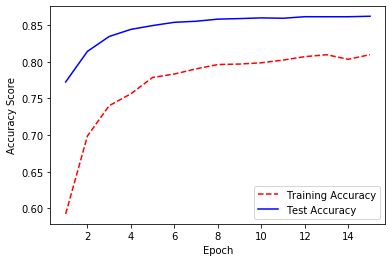

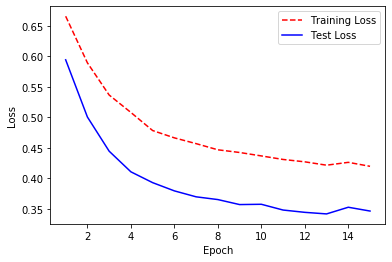

In [15]:
# 훈련 정확도와 테스트 정확도 기록을 저장합니다.
import matplotlib.pyplot as plt
%matplotlib inline

# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Accuracy')
# plt.legend(['train','test'], loc='upper left')
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy Score")
# plt.show()

training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

training_loss = history.history["loss"]
test_loss = history.history['val_loss']

plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# 정확도 그래프를 그립니다.
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();

plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")

# 정확도 그래프를 그립니다.
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

#### 해답

In [40]:
# 매우 다양한 네트워크 구조에서 수행할 수 있는 모델 파라미터 값을 학습하도록
# 유닛을 강제 - 은닉 유닛에 있는 잡음에 영향을 받지 않도록 학습되고 네트워크가
# 훈련 데이터를 단순히 암기하지 못하도록 함
# 일반적을 선택하는 드롭될 유닛의 비율은 입력유닛에서 0.2, 은닉유닛에서 0.5

import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

# 랜덤 시드를 설정합니다.
np.random.seed(0)

# 필요한 특성 개수를 지정합니다.
number_of_features = 1000

# 영화 리뷰 데이터에서 훈련 데이터와 타깃 벡터를 로드합니다.
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# 영화 리뷰 데이터를 원-핫 인코딩된 특성 행렬로 변환합니다.
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 신경망 모델을 만듭니다.
network = models.Sequential()

# 입력층으로 드롭아웃 층을 추가합니다.
network.add(layers.Dropout(0.2, input_shape=(number_of_features,)))

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16, activation="relu"))

# Add a dropout layer for previous hidden layer
network.add(layers.Dropout(0.5))

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16, activation="relu"))

# Add a dropout layer for previous hidden layer
network.add(layers.Dropout(0.5))

# 시그모이드 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=1, activation="sigmoid"))

# 신경망의 모델 설정을 완료합니다.
network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                optimizer="rmsprop", # 옵티마이저
                metrics=["accuracy"]) # 성능 지표

# 신경망을 훈련합니다.
history = network.fit(features_train, # 특성
                      target_train, # 타깃 벡터
                      epochs=15, # 에포크 횟수
                      verbose=1, # 출력 없음
                      batch_size=100, # 배치의 샘플 개수
                      validation_data=(features_test, target_test)) # 테스트 데이터

# # 훈련 손실과 테스트 손실의 기록을 저장합니다.
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

# # 에포크 횟수를 사용해 카운트 객체를 만듭니다.
epoch_count = range(1, len(training_accuracy) + 1)

print('\n')
print('모델 성능 :')
print(network.evaluate(features_test, target_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 2s 65us/step - loss: 0.6269 - accuracy: 0.6333 - val_loss: 0.4818 - val_accuracy: 0.8248
Epoch 2/15
25000/25000 [==============================] - 2s 60us/step - loss: 0.5046 - accuracy: 0.7594 - val_loss: 0.3790 - val_accuracy: 0.8468
Epoch 3/15
25000/25000 [==============================] - 1s 59us/step - loss: 0.4464 - accuracy: 0.7999 - val_loss: 0.3535 - val_accuracy: 0.8551
Epoch 4/15
25000/25000 [==============================] - 1s 58us/step - loss: 0.4300 - accuracy: 0.8158 - val_loss: 0.3399 - val_accuracy: 0.8593
Epoch 5/15
25000/25000 [==============================] - 1s 57us/step - loss: 0.4132 - accuracy: 0.8270 - val_loss: 0.3414 - val_accuracy: 0.8578
Epoch 6/15
25000/25000 [==============================] - 1s 59us/step - loss: 0.4088 - accuracy: 0.8294 - val_loss: 0.3350 - val_accuracy: 0.8596
Epoch 7/15
25000/25000 [==============================] - 1s 58us/st

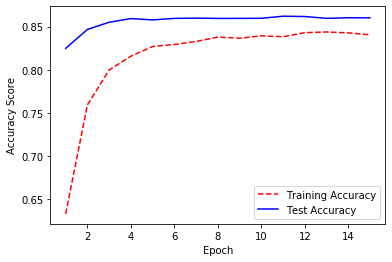

In [41]:
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# 정확도 그래프를 그립니다.
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();

## 가중치 규제로 과대적합 줄이기

kernel_regularizer=regularizers.l2(0.01)
- 기본형: kernel_regularizer='l1_l2'
- 출력층에는 필요없고 은닉층에만 넣어줌

과소적합인 상태에서 가중치 규제를 더하면 오히려 부작용 발생
- 결과에 따라 판단

In [16]:
# 라이브러리를 임포트합니다.
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras import regularizers

# 랜덤 시드를 설정합니다.
np.random.seed(0)

# 필요한 특성 개수를 지정합니다.
number_of_features = 1000

# 영화 리뷰 데이터에서 훈련 데이터와 타깃 벡터를 로드합니다.
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# 영화 리뷰 데이터를 원-핫 인코딩된 특성 행렬로 변환합니다.
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 신경망 모델을 만듭니다.
network = models.Sequential()

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16,
                         activation="relu",
                         kernel_regularizer=regularizers.l2(0.01),
#                          kernel_regularizer='l1_l2',
                         input_shape=(number_of_features,)))

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
# 층의 매개변수로 kernel_regularizer=regularizers.ㅣ2(0.01)를 지정하여 가중치 규제
# 0.01은 가중치가 큰 모델 파라미터 값에 얼마나 패널티를 부여할지를 결정함
# l1, l2 규제 동시 :l1_l2(l1=0.01,l2=0.01), 기본값을 사용 : l1_l2
network.add(layers.Dense(units=16,
                         kernel_regularizer=regularizers.l2(0.01),
#                          kernel_regularizer='l1_l2',
                         activation="relu"))

# 시그모이드 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=1, activation="sigmoid"))

# 신경망의 모델 설정을 완료합니다.
network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                optimizer="rmsprop", # 옵티마이저
                metrics=["accuracy"]) # 성능 지표

# 신경망을 훈련합니다.
history = network.fit(features_train, # 특성
                      target_train, # 타깃 벡터
                      epochs=15, # 에포크 횟수
                      verbose=1, # 출력 없음
                      batch_size=100, # 배치의 샘플 개수
                      validation_data=(features_test, target_test)) # 테스트 데이터

print('\n')
print('모델 성능 :')
print(network.evaluate(features_test, target_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 1s 24us/step - loss: 0.6374 - accuracy: 0.8126 - val_loss: 0.4902 - val_accuracy: 0.8515
Epoch 2/15
25000/25000 [==============================] - 1s 22us/step - loss: 0.4647 - accuracy: 0.8548 - val_loss: 0.4485 - val_accuracy: 0.8564
Epoch 3/15
25000/25000 [==============================] - 1s 21us/step - loss: 0.4389 - accuracy: 0.8560 - val_loss: 0.4435 - val_accuracy: 0.8470
Epoch 4/15
25000/25000 [==============================] - 1s 21us/step - loss: 0.4265 - accuracy: 0.8537 - val_loss: 0.4346 - val_accuracy: 0.8476
Epoch 5/15
25000/25000 [==============================] - 1s 21us/step - loss: 0.4164 - accuracy: 0.8572 - val_loss: 0.4355 - val_accuracy: 0.8437
Epoch 6/15
25000/25000 [==============================] - 1s 21us/step - loss: 0.4102 - accuracy: 0.8558 - val_loss: 0.4218 - val_accuracy: 0.8474
Epoch 7/15
25000/25000 [==============================] - 1s 20us/st

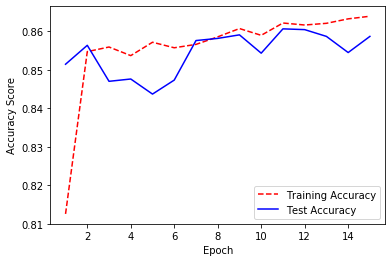

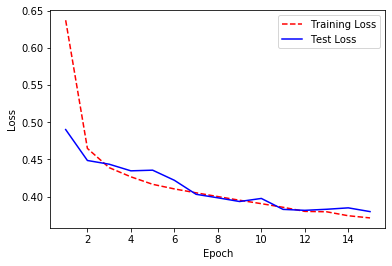

In [17]:
# 훈련 정확도와 테스트 정확도 기록을 저장합니다.
import matplotlib.pyplot as plt
%matplotlib inline

training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

training_loss = history.history["loss"]
test_loss = history.history['val_loss']

plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# 정확도 그래프를 그립니다.
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();

plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")

# 정확도 그래프를 그립니다.
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

## 조기종료로 과대적합 줄이기

In [1]:
# 케라스에서 콜백 함수로 조기 종료를 구현
# 라이브러리를 임포트합니다.
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

# 랜덤 시드를 설정합니다.
np.random.seed(0)

# 필요한 특성 개수를 지정합니다.
number_of_features = 1000

# 영화 리뷰 데이터에서 훈련 데이터와 타깃 벡터를 로드합니다.
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# 영화 리뷰 데이터를 원-핫 인코딩된 특성 행렬로 변환합니다.
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 신경망 모델을 만듭니다.
network = models.Sequential()

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16,
                         activation="relu",
                         input_shape=(number_of_features,)))

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16, activation="relu"))

# 시그모이드 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=1, activation="sigmoid"))

# 신경망의 모델 설정을 완료합니다.
network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                optimizer="rmsprop", # 옵티마이저
                metrics=["accuracy"]) # 성능 지표

# 훈련을 조기 종료하고 최선의 모델을 저장하기 위해 콜백 함수를 설정합니다.
# EarlyStopping(monitor(기준을 정해줌)="val_loss", patience=2)을 추가하여 에폭마다 테스트 
# (검증) 손실을 감시하여 연속적으로 2 에폭 동안 테스트 손실이 향상되지 않으며
# 훈련을 멈춤
# 성능 개선여지 없을 때 조기 종료
callbacks = [EarlyStopping(monitor="val_loss", patience=2),
             ModelCheckpoint(filepath="best_model.h5",
                             monitor="val_loss",
                             save_best_only=True)]

# 신경망을 훈련합니다.
history = network.fit(features_train, # 특성
                      target_train, # 타깃 벡터
                      epochs=15, # 에포크 횟수
                      callbacks=callbacks, # 조기 종료
                      verbose=1, # 에포크 과정을 출력합니다.
                      batch_size=100, # 배치의 샘플 개수
                      validation_data=(features_test, target_test)) # 테스트 데이터

print('\n')
print('모델 성능 :')
print(network.evaluate(features_test, target_test))

Using TensorFlow backend.


Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 1s 23us/step - loss: 0.4195 - accuracy: 0.8120 - val_loss: 0.3394 - val_accuracy: 0.8546
Epoch 2/15
25000/25000 [==============================] - 0s 19us/step - loss: 0.3225 - accuracy: 0.8641 - val_loss: 0.3284 - val_accuracy: 0.8594
Epoch 3/15
25000/25000 [==============================] - 0s 20us/step - loss: 0.3107 - accuracy: 0.8691 - val_loss: 0.3392 - val_accuracy: 0.8537
Epoch 4/15
25000/25000 [==============================] - 0s 19us/step - loss: 0.3024 - accuracy: 0.8708 - val_loss: 0.3274 - val_accuracy: 0.8593
Epoch 5/15
25000/25000 [==============================] - 0s 20us/step - loss: 0.2926 - accuracy: 0.8762 - val_loss: 0.3425 - val_accuracy: 0.8518
Epoch 6/15
25000/25000 [==============================] - 0s 19us/step - loss: 0.2831 - accuracy: 0.8796 - val_loss: 0.3330 - val_accuracy: 0.8560


모델 성능 :
25000/25000 [==============================] - 0s 11us/ste

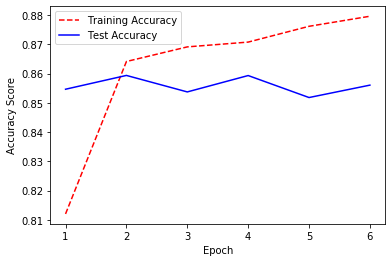

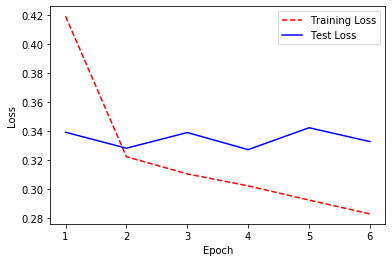

In [3]:
# 에포크 횟수를 사용해 카운트 객체를 만듭니다.
epoch_count = range(1, len(training_accuracy) + 1)

# 훈련 정확도와 테스트 정확도 기록을 저장합니다.
import matplotlib.pyplot as plt
%matplotlib inline

training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

training_loss = history.history["loss"]
test_loss = history.history['val_loss']

plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# 정확도 그래프를 그립니다.
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();

plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")

# 정확도 그래프를 그립니다.
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

### dropout, 가중치 규제, 조기 종료 합치기

In [7]:
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint

# 랜덤 시드를 설정합니다.
np.random.seed(0)

# 필요한 특성 개수를 지정합니다.
number_of_features = 1000

# 영화 리뷰 데이터에서 훈련 데이터와 타깃 벡터를 로드합니다.
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# 영화영화 리뷰 데이터를 원-핫 인코딩된 특성 행렬로 변환합니다.
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 신경망 모델을 만듭니다.
network = models.Sequential()

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dropout(0.2, input_shape=(number_of_features,)))

# Dropout 추가
network.add(Dropout(0.3, noise_shape=None, seed=None))

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16,
                         activation="relu",
                         kernel_regularizer=regularizers.l2(0.01),
#                          kernel_regularizer='l1_l2',
                         input_shape=(number_of_features,)))

# Dropout 추가
network.add(Dropout(0.5, noise_shape=None, seed=None))

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
# 층의 매개변수로 kernel_regularizer=regularizers.ㅣ2(0.01)를 지정하여 가중치 규제
# 0.01은 가중치가 큰 모델 파라미터 값에 얼마나 패널티를 부여할지를 결정함
# l1, l2 규제 동시 :l1_l2(l1=0.01,l2=0.01), 기본값을 사용 : l1_l2
network.add(layers.Dense(units=16,
                         kernel_regularizer=regularizers.l2(0.01),
#                          kernel_regularizer='l1_l2',
                         activation="relu"))

# 시그모이드 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=1, activation="sigmoid"))


# 신경망의 모델 설정을 완료합니다.
network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                optimizer="rmsprop", # 옵티마이저
                metrics=["accuracy"]) # 성능 지표


# 훈련을 조기 종료하고 최선의 모델을 저장하기 위해 콜백 함수를 설정합니다.
# EarlyStopping(monitor(기준을 정해줌)="val_loss", patience=2)을 추가하여 에폭마다 테스트 
# (검증) 손실을 감시하여 연속적으로 2 에폭 동안 테스트 손실이 향상되지 않으며
# 훈련을 멈춤
# 성능 개선여지 없을 때 조기 종료
callbacks = [EarlyStopping(monitor="val_loss", patience=2),
             ModelCheckpoint(filepath="best_model.h5",
                             monitor="val_loss",
                             save_best_only=True)]

# 신경망을 훈련합니다.
history = network.fit(features_train, # 특성
                      target_train, # 타깃 벡터
                      epochs=15, # 에포크 횟수
                      callbacks=callbacks, # 조기 종료
                      verbose=1, # 에포크 과정을 출력합니다.
                      batch_size=100, # 배치의 샘플 개수
                      validation_data=(features_test, target_test)) # 테스트 데이터

print('\n')
print('모델 성능 :')
print(network.evaluate(features_test, target_test))

# 훈련 손실과 테스트 손실의 기록을 저장합니다.
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

# 에포크 횟수를 사용해 카운트 객체를 만듭니다.
epoch_count = range(1, len(training_accuracy) + 1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 1s 37us/step - loss: 0.7881 - accuracy: 0.6699 - val_loss: 0.5410 - val_accuracy: 0.8402
Epoch 2/15
25000/25000 [==============================] - 1s 32us/step - loss: 0.5855 - accuracy: 0.7681 - val_loss: 0.4690 - val_accuracy: 0.8528
Epoch 3/15
25000/25000 [==============================] - 1s 36us/step - loss: 0.5445 - accuracy: 0.7815 - val_loss: 0.4503 - val_accuracy: 0.8488
Epoch 4/15
25000/25000 [==============================] - 1s 38us/step - loss: 0.5289 - accuracy: 0.7874 - val_loss: 0.4472 - val_accuracy: 0.8513
Epoch 5/15
25000/25000 [==============================] - 1s 37us/step - loss: 0.5250 - accuracy: 0.7884 - val_loss: 0.4454 - val_accuracy: 0.8565
Epoch 6/15
25000/25000 [==============================] - 1s 37us/step - loss: 0.5223 - accuracy: 0.7892 - val_loss: 0.4370 - val_accuracy: 0.8522
Epoch 7/15
25000/25000 [==============================] - 1s 38us/st

## 모델 훈련 진행 과정을 저장하기

In [44]:
# 라이브러리를 임포트합니다.
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

# 랜덤 시드를 설정합니다.
np.random.seed(0)

# 필요한 특성 개수를 지정합니다.
number_of_features = 1000

# IMDB 영화 데이터에서 훈련 데이터와 타깃 벡터를 로드합니다.
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# IMDB 데이터를 원-핫 인코딩된 특성 행렬로 변환합니다.
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 신경망 모델을 만듭니다.
network = models.Sequential()
network.add(layers.Dropout(0.2, input_shape=(number_of_features,)))
network.add(layers.Dense(units=16, 
                         kernel_regularizer=regularizers.l2(0.01),
                         activation="relu"))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(units=16,
                         kernel_regularizer=regularizers.l2(0.01),
                         activation="relu"))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(units=1, activation="sigmoid"))


# 신경망의 모델 설정을 완료합니다.
network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                optimizer="rmsprop",        # 옵티마이저
                metrics=["accuracy"])       # 성능 지표

# 조기 종료
callbacks = [EarlyStopping(monitor="val_loss", patience=2),
             ModelCheckpoint(filepath="best_model.h5",
                             monitor="val_loss",
                             save_best_only=True)]

# 신경망을 훈련합니다.
history = network.fit(features_train, # 특성
                      target_train, # 타깃 벡터
                      epochs=15, # 에포크 횟수
                      callbacks=callbacks, # 조기 종료
                      verbose=1, # 에포크 과정을 출력합니다.
                      batch_size=100, # 배치의 샘플 개수
                      validation_data=(features_test, target_test)) # 테스트 데이터

# 훈련 손실과 테스트 손실의 기록을 저장합니다.
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

# 에포크 횟수를 사용해 카운트 객체를 만듭니다.
epoch_count = range(1, len(training_accuracy) + 1)     
     
print('\n')
print('모델 성능 :')
print(network.evaluate(features_test, target_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 2s 65us/step - loss: 0.7930 - accuracy: 0.6482 - val_loss: 0.5469 - val_accuracy: 0.8402
Epoch 2/15
25000/25000 [==============================] - 1s 58us/step - loss: 0.5648 - accuracy: 0.7914 - val_loss: 0.4587 - val_accuracy: 0.8502
Epoch 3/15
25000/25000 [==============================] - 1s 59us/step - loss: 0.5232 - accuracy: 0.8118 - val_loss: 0.4500 - val_accuracy: 0.8540
Epoch 4/15
25000/25000 [==============================] - 1s 60us/step - loss: 0.5121 - accuracy: 0.8140 - val_loss: 0.4257 - val_accuracy: 0.8573
Epoch 5/15
25000/25000 [==============================] - 1s 59us/step - loss: 0.5013 - accuracy: 0.8178 - val_loss: 0.4377 - val_accuracy: 0.8535
Epoch 6/15
25000/25000 [==============================] - 1s 59us/step - loss: 0.5002 - accuracy: 0.8164 - val_loss: 0.4221 - val_accuracy: 0.8567
Epoch 7/15
25000/25000 [==============================] - 2s 60us/st

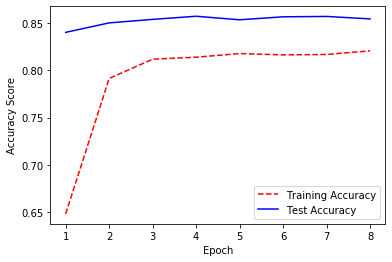

In [45]:
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# 정확도 그래프를 그립니다.
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();

In [46]:
# 신경망 모델 저장
network.save('model.h5')

In [47]:
from keras.models import load_model
network = load_model('model.h5')
network.evaluate(features_test, target_test)

25000/25000 [==============================] - 1s 35us/step


[0.42209520350456237, 0.8544800281524658]